In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import mnist
from sklearn.svm import SVC

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
def sample_tox(x,y):
    nmax = x.shape[0]
    num_classes = y.shape[0]
    img_width = img_height = x_train[0].shape[0]
    x_vec = x.reshape(x.shape[0], img_width*img_height)[0:nmax,]/255
    dummies=pd.get_dummies(y).to_numpy()
    return(x_vec,dummies)

n_train , n_test = 60000, 10000
x_train, y_train = X_train[:n_train,:,:] , Y_train[:n_train]
x_test, y_test =  X_test[:n_test,:,:] , Y_test[:n_test]
x_tra, y_tra=sample_tox(x_train,y_train)
x_te, y_te=sample_tox(x_test,y_test)
print(np.shape(x_tra),np.shape(x_te),np.shape(y_tra),np.shape(y_te))

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [4]:
svc=SVC(kernel="rbf", gamma= 0.01 ,C=10)
svc.fit(x_tra,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
y_predic=svc.predict(x_te)

In [16]:
np.sum(y_predic==y_test)/y_test.shape*100

array([98.33])

# Máquina de soporte vectorial

In [44]:
from sklearn.model_selection import GridSearchCV
# El grid de parámetros lo definimos como un diccionario
parameters = [
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
  {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=SVC(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)

print('Best score:', GS.best_score_) 
print('Best C:',GS.best_estimator_.C) 
print('Best Kernel:',GS.best_estimator_.kernel)
print('Best Gamma:',GS.best_estimator_.gamma)

C:\Users\javie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.901
Best C: 10
Best Kernel: rbf
Best Gamma: 0.01


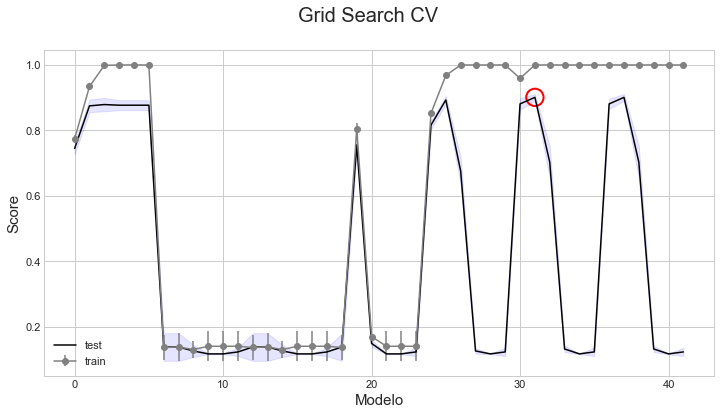

In [45]:
scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']
plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd, alpha=0.1, color='blue')
plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),], s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray', ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best");

# Regresión Logística

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# El grid de parámetros lo definimos como un diccionario
parameters = [
    {'C': [0.1, 1, 10, 100], "solver": ["lbfgs","newton-cg","saga"]},
]
# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)

print('Best score:', GS.best_score_) 
print('Best C:',GS.best_estimator_.C) 
print('Best solver:',GS.best_estimator_.solver)

C:\Users\javie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best score: 0.854
Best C: 100
Best solver: saga


# Árboles de clasificación

In [75]:
from sklearn.tree import DecisionTreeClassifier

# El grid de parámetros lo definimos como un diccionario
parameters = [
    {'max_depth': np.arange(1, 20, 'min_samples_split': [2, 3, 4], "criterion": ["entropy"]},
    {'max_depth': np.arange(1, 20), 'min_samples_split': [2, 3, 4], "criterion": ["gini"]},
]

# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)

print('Best score:', GS.best_score_) 
print('Best depth:',GS.best_estimator_.max_depth)
print('Best samples_split:',GS.best_estimator_.min_samples_split)
print('Best criterion:',GS.best_estimator_.criterion)



C:\Users\javie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.666
Best depth: 8
Best samples_split: 4
Best criterion: entropy


# Ada boost

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


parameters = {'n_estimators': [100,200]}

DTC = DecisionTreeClassifier(random_state = 42,max_depth=15
                             ,min_samples_split=3,criterion="entropy")
ABC = AdaBoostClassifier(base_estimator = DTC)

# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(estimator=ABC, param_grid=parameters, cv = cvfolds, return_train_score=True, n_jobs=-1)
GS.fit(x_tra,y_train)
print('Best score:', GS.best_score_) 
GS.best_params_

Best score: 0.86


{'n_estimators': 100}

# MLP Classifier

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

parameters = {'max_iter': np.arange(1000,2000,200), 
              'alpha': 10.0 ** -np.arange(1, 6),'hidden_layer_sizes':np.arange(10, 15)
             }

# Realiza Grid Search
cvfolds = 5
GS = GridSearchCV(MLPClassifier(solver='lbfgs',random_state=42), cv=cvfolds, param_grid=parameters, n_jobs=-1)
GS.fit(x_tra,y_train)
print('Best score:', GS.best_score_) 
GS.best_params_

C:\Users\javie\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\javie\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: 0.84


{'alpha': 0.1, 'hidden_layer_sizes': 12, 'max_iter': 1000}

# Training the best one

In [ ]:
Best C: 10
Best Kernel: rbf
Best Gamma: 0.01